## Dependence on the Bin Size

In [1]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate 
from code.plot_utils import plot_pretty
from matplotlib import rcParams
rcParams['font.family'] = 'serif' 
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Ang_clust_WITH_cross import Fisher_calculator as Fisher_CROSS

In [3]:
from Ang_clust_NO_cross import Full_Fisher as Fisher_NO 

Note inputs:

- Fisher_NO(z_init, z_final, N_bins, sig_z, f_sky, N_gal, z_0, a, b)

- Fisher_CROSS(z_init, z_final, N_bins, f_sky, sig_z, N_gal, z_0, a, b)

In [4]:
# Import function that marginalizes over the the nuisance parameters
from Tools import marginalize as marg
# Import function that adds a constant prior of the form sigma(sigma_z) = sigma(z_b), same in every bin
from Tools import priors_1
# Import function that adds a constant prior of the form sigma(sigma_z) = sigma(z_b) = alpha*sigma_z, same in every bin
from Tools import priors_2
from Tools import priors_3
# Import function that calculates Figure of Merit
from Tools import FoM_return 

In [5]:
# Survey parameters for the Fisher matrix 
# =====================================================
# =====================================================
z_init =  0.20 #Initial redshift
z_final = 0.95 #Final redshift
#N_bins = 5 #Number of bins
f_sky = 5000.0/41253.0 # Fraction of the sky

# Parameters of the redshift distribution
z_0 = 0.50
a = 1.47
b = 2.09
# =====================================================
# =====================================================
# Parameters (size and redshift error for the particular samples I'm going to consider)

# redMaGiC-like sample
N_g_rm, sig_rm = 2.43e6, 0.017
# Color-cuts like sample
N_g_CC, sig_CC = 1.74e7, 0.042
# Flux-limited like sample
N_g_fl, sig_fl = 6.75e7, 0.073

#Conservative priors
alpha_con = 0.4

In [6]:
# Sample size for all cases
N_g = 5.0e7

# Define some sigmas
sig_1 = 0.05
sig_2 = 0.08
sig_3 = 0.10

# range of number of bins to consider
N_bins = np.arange(2,21)

length = len(N_bins)

#Initialize arrays to contain FoMs


#With cross-correlations

# Three samples with the N_g defined above
FoMs_1_cross = np.zeros(length)
FoMs_2_cross = np.zeros(length)
FoMs_3_cross = np.zeros(length)
# redMaGiC, BAO and flux-limited samples
FoMs_rm_cross = np.zeros(length)
FoMs_CC_cross = np.zeros(length)
FoMs_fl_cross = np.zeros(length)



#Without cross-correaltions

#Three samples with the N_g defined above
FoMs_1_auto = np.zeros(length)
FoMs_2_auto = np.zeros(length)
FoMs_3_auto = np.zeros(length)
# redMaGiC, BAO and flux-limited samples
FoMs_rm_auto = np.zeros(length)
FoMs_CC_auto = np.zeros(length)
FoMs_fl_auto = np.zeros(length)


for i in range(length):
    N_bin = N_bins[i]  # Number of bins
    
    # ================================================
    # ================================================
    # Calculation of free Fisher matrices 
    
    # Without cross-correlations first
    Fish_1_NO_free = Fisher_NO(z_init, z_final, N_bin, sig_1, f_sky, N_g, z_0, a, b)
    Fish_2_NO_free = Fisher_NO(z_init, z_final, N_bin, sig_2, f_sky, N_g, z_0, a, b)
    Fish_3_NO_free = Fisher_NO(z_init, z_final, N_bin, sig_3, f_sky, N_g, z_0, a, b)
    
    #Including ross-correlations 
    Fish_1_CROSS_free = Fisher_CROSS(z_init, z_final, N_bin, f_sky, sig_1, N_g, z_0, a, b)
    Fish_2_CROSS_free = Fisher_CROSS(z_init, z_final, N_bin, f_sky, sig_2, N_g, z_0, a, b)
    Fish_3_CROSS_free = Fisher_CROSS(z_init, z_final, N_bin, f_sky, sig_3, N_g, z_0, a, b)
    
    
    # =================================================
    # =================================================
    # Add priors
    
    #Without cross-correlations
    Fish_1_NO_pr = priors_2(Fish_1_NO_free, N_bin, alpha_con, sig_1)
    Fish_2_NO_pr = priors_2(Fish_2_NO_free, N_bin, alpha_con, sig_2)
    Fish_3_NO_pr = priors_2(Fish_3_NO_free, N_bin, alpha_con, sig_3)
    
    
    # Including cross-correlations
    Fish_1_CROSS_pr = priors_2(Fish_1_CROSS_free, N_bin, alpha_con, sig_1)
    Fish_2_CROSS_pr = priors_2(Fish_2_CROSS_free, N_bin, alpha_con, sig_2)
    Fish_3_CROSS_pr = priors_2(Fish_3_CROSS_free, N_bin, alpha_con, sig_3)
    
    # ==================================================
    # ==================================================
    # Calculate the FoMs and populate the corresponding
    # FoM arrays
    
    # Without cross-correlations
    FoMs_1_auto[i] = FoM_return(Fish_1_NO_pr)
    FoMs_2_auto[i] = FoM_return(Fish_2_NO_pr)
    FoMs_3_auto[i] = FoM_return(Fish_3_NO_pr)
    
    
    # Including cross-correlations
    FoMs_1_cross[i] = FoM_return(Fish_1_CROSS_pr)
    FoMs_2_cross[i] = FoM_return(Fish_2_CROSS_pr)
    FoMs_3_cross[i] = FoM_return(Fish_3_CROSS_pr)
    
    # Print to know in which step of the loop we are
    print ("Done for number of bins:", N_bin)

('Done for number of bins:', 2)
('Done for number of bins:', 3)
('Done for number of bins:', 4)
('Done for number of bins:', 5)
('Done for number of bins:', 6)
('Done for number of bins:', 7)
('Done for number of bins:', 8)
('Done for number of bins:', 9)
('Done for number of bins:', 10)
('Done for number of bins:', 11)
('Done for number of bins:', 12)
('Done for number of bins:', 13)
('Done for number of bins:', 14)
('Done for number of bins:', 15)
('Done for number of bins:', 16)
('Done for number of bins:', 17)
('Done for number of bins:', 18)
('Done for number of bins:', 19)
('Done for number of bins:', 20)


In [7]:
# Normalize at the FoM of the redmagic samples
Fisher_baseline = Fisher_NO(z_init, z_final, 5, sig_rm, f_sky, N_g_rm, z_0, a, b)
#Add prior
Fisher_baseline_pr = priors_2(Fisher_baseline, 5, alpha_con, sig_rm)
# Calculate FoM
FoM_baseline = FoM_return(Fisher_baseline_pr)

In [8]:
for i in range(length):
    N_bin = N_bins[i]  # Number of bins
    
    # ================================================
    # ================================================
    # Calculation of free Fisher matrices 
    
    # Without cross-correlations first
    Fish_rm_NO_free = Fisher_NO(z_init, z_final, N_bin, sig_rm, f_sky, N_g_rm, z_0, a, b)
    Fish_CC_NO_free = Fisher_NO(z_init, z_final, N_bin, sig_CC, f_sky, N_g_CC, z_0, a, b)
    Fish_fl_NO_free = Fisher_NO(z_init, z_final, N_bin, sig_fl, f_sky, N_g_fl, z_0, a, b)
    
    #Including ross-correlations 
    Fish_rm_CROSS_free = Fisher_CROSS(z_init, z_final, N_bin, f_sky, sig_rm, N_g_rm, z_0, a, b)
    Fish_CC_CROSS_free = Fisher_CROSS(z_init, z_final, N_bin, f_sky, sig_CC, N_g_CC, z_0, a, b)
    Fish_fl_CROSS_free = Fisher_CROSS(z_init, z_final, N_bin, f_sky, sig_fl, N_g_fl, z_0, a, b)
    
    
    # =================================================
    # =================================================
    # Add priors
    
    #Without cross-correlations
    Fish_rm_NO_pr = priors_2(Fish_rm_NO_free, N_bin, alpha_con, sig_rm)
    Fish_CC_NO_pr = priors_2(Fish_CC_NO_free, N_bin, alpha_con, sig_CC)
    Fish_fl_NO_pr = priors_2(Fish_fl_NO_free, N_bin, alpha_con, sig_fl)
    
    
    # Including cross-correlations
    Fish_rm_CROSS_pr = priors_2(Fish_rm_CROSS_free, N_bin, alpha_con, sig_rm)
    Fish_CC_CROSS_pr = priors_2(Fish_CC_CROSS_free, N_bin, alpha_con, sig_CC)
    Fish_fl_CROSS_pr = priors_2(Fish_fl_CROSS_free, N_bin, alpha_con, sig_fl)
    
    # ==================================================
    # ==================================================
    # Calculate the FoMs and populate the corresponding
    # FoM arrays
    
    # Without cross-correlations
    FoMs_rm_auto[i] = FoM_return(Fish_rm_NO_pr)
    FoMs_CC_auto[i] = FoM_return(Fish_CC_NO_pr)
    FoMs_fl_auto[i] = FoM_return(Fish_fl_NO_pr)
    
    
    # Including cross-correlations
    FoMs_rm_cross[i] = FoM_return(Fish_rm_CROSS_pr)
    FoMs_CC_cross[i] = FoM_return(Fish_CC_CROSS_pr)
    FoMs_fl_cross[i] = FoM_return(Fish_fl_CROSS_pr)
    
    # Print to know in which step of the loop we are
    print ("Done for number of bins:", N_bin)

('Done for number of bins:', 2)
('Done for number of bins:', 3)
('Done for number of bins:', 4)
('Done for number of bins:', 5)
('Done for number of bins:', 6)
('Done for number of bins:', 7)
('Done for number of bins:', 8)
('Done for number of bins:', 9)
('Done for number of bins:', 10)
('Done for number of bins:', 11)
('Done for number of bins:', 12)
('Done for number of bins:', 13)
('Done for number of bins:', 14)
('Done for number of bins:', 15)
('Done for number of bins:', 16)
('Done for number of bins:', 17)
('Done for number of bins:', 18)
('Done for number of bins:', 19)
('Done for number of bins:', 20)


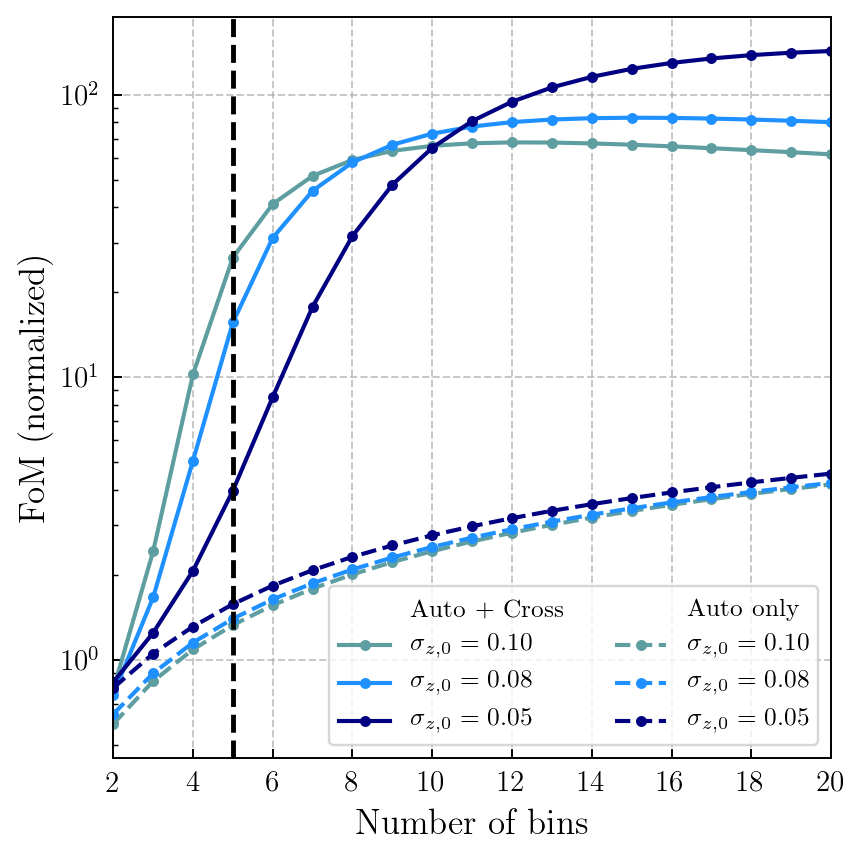

In [21]:
plot_pretty()
fig = plt.figure(figsize = (5.0,5.0))


plt.plot([],marker="", ls="", label='Auto + Cross')
plt.plot(N_bins, FoMs_3_cross/FoM_baseline, linewidth=1.7, c='cadetblue',marker='o',markersize=3.5, label=r'$\sigma_{z,0}=0.10$')
plt.plot(N_bins, FoMs_2_cross/FoM_baseline, linewidth=1.7, c='dodgerblue', marker='o',markersize=3.5,  label=r'$\sigma_{z,0}=0.08$')
plt.plot(N_bins, FoMs_1_cross/FoM_baseline, linewidth=1.7, c='navy', marker='o', markersize=3.5,label=r'$\sigma_{z,0}=0.05$')



plt.plot([],marker="", ls="", label='Auto only')

plt.plot(N_bins, FoMs_3_auto/FoM_baseline, ls='--',linewidth=1.7, c='cadetblue',marker='o',markersize=3.5, label=r'$\sigma_{z,0}=0.10$')
plt.plot(N_bins, FoMs_2_auto/FoM_baseline, ls='--',linewidth=1.7, c='dodgerblue',marker='o',markersize=3.5, label=r'$\sigma_{z,0}=0.08$')
plt.plot(N_bins, FoMs_1_auto/FoM_baseline, ls='--',linewidth=1.7, c='navy',marker='o',markersize=3.5,  label=r'$\sigma_{z,0}=0.05$')


plt.xlim(2,20)
plt.grid(ls='--', alpha=0.7)
plt.legend(frameon=True, loc='lower right', ncol=2,fontsize=10.5)


plt.tick_params(axis='both', labelsize=12)
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.yticks([1,10,100])

plt.axvline(5, c='black', ls='--', linewidth=2.)

plt.xlabel('Number of bins', fontsize = 14.5);plt.ylabel('FoM (normalized)', fontsize=14.5)
plt.yscale('log')
plt.savefig('FoM_nbins1.pdf')
plt.tight_layout()
plt.show()

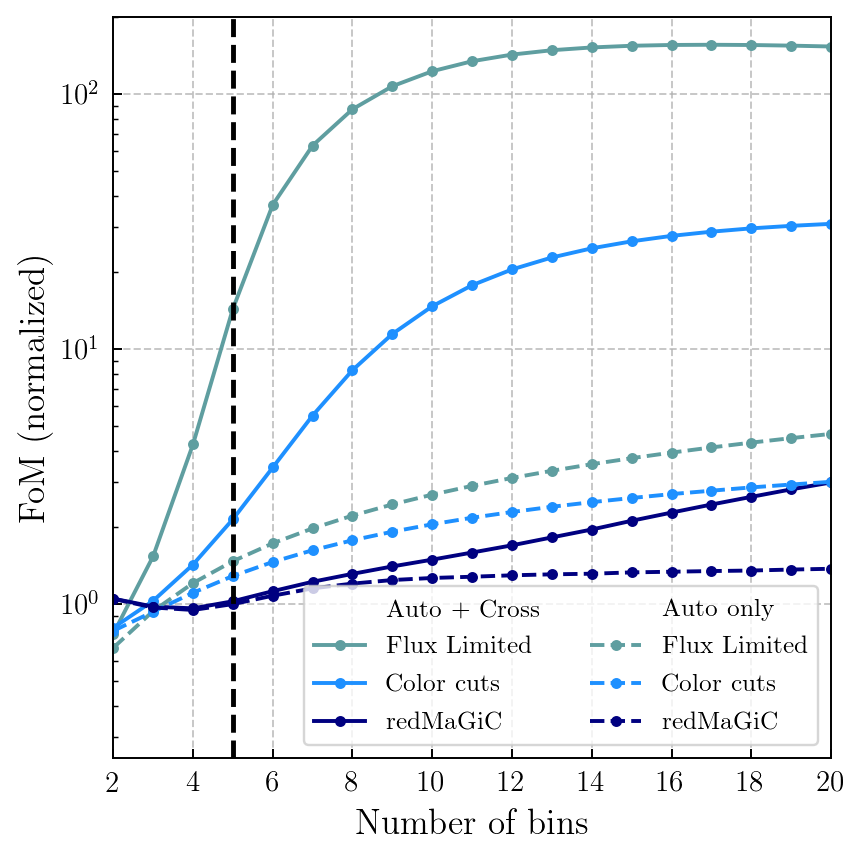

In [22]:
plot_pretty()
fig = plt.figure(figsize = (5.0,5.0))

plt.plot([],marker="", ls="", label='Auto + Cross')

plt.plot(N_bins, FoMs_fl_cross/FoM_baseline, linewidth=1.6, c='cadetblue', marker='o', markersize=3.5, label='Flux Limited')
plt.plot(N_bins, FoMs_CC_cross/FoM_baseline, linewidth=1.6, c='dodgerblue', marker='o', markersize=3.5, label='Color cuts')
plt.plot(N_bins, FoMs_rm_cross/FoM_baseline, linewidth=1.6, c='navy', marker='o', markersize=3.5, label='redMaGiC')




plt.plot([],marker="", ls="", label='Auto only')

plt.plot(N_bins, FoMs_fl_auto/FoM_baseline, ls='--', linewidth=1.6, c='cadetblue', marker='o', markersize=3.5, label='Flux Limited')
plt.plot(N_bins, FoMs_CC_auto/FoM_baseline, ls='--',linewidth=1.6, c='dodgerblue', marker='o', markersize=3.5, label='Color cuts')
plt.plot(N_bins, FoMs_rm_auto/FoM_baseline, ls='--', linewidth=1.6, c='navy', marker='o', markersize=3.5, label='redMaGiC')



plt.grid(ls='--', alpha=0.7)
plt.xlabel('Number of bins', fontsize = 14.5);plt.ylabel('FoM (normalized)', fontsize=14.5)

plt.xlim(2,20)
plt.ylim(2.5e-1,2e2)
plt.yscale('log')



plt.tick_params(axis='both', labelsize=12)
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.yticks([1,10,100])


plt.axvline(5, c='black', ls='--', linewidth=2.)

plt.legend(frameon=True, loc='lower right', ncol=2, fontsize=10.5)
plt.savefig('FoM_nbins2.pdf')
plt.tight_layout()
plt.show()